In [ ]:
!git clone https://github.com/bjporu/TFG

Cloning into 'TFG'...
remote: Enumerating objects: 2372, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2372 (delta 0), reused 0 (delta 0), pack-reused 2363 (from 3)
Receiving objects: 100% (2372/2372), 2.40 GiB | 17.44 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (2311/2311), done.


In [ ]:
import numpy as np
print(np.__version__)
import torch
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
print(torch.__version__)

from dataclasses import dataclass
import time as time

import torchaudio
import librosa

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
import IPython.display as ipd
import random
import os

import soundfile as sf

from sklearn.model_selection import train_test_split

import seaborn as sns
from collections import Counter

from torch.utils.data import DataLoader, TensorDataset

2.0.2
2.6.0+cu124


In [ ]:
@dataclass
class Song:
    title: str
    artist: str

songs = [
    # Test
    Song("Guitar Chords", "Test"),
    Song("Guitar Chords 2", "Test"),
    Song("Guitar Chords 3", "Test"),
    Song("Mellow Synth", "Test"),
    Song("Organ Strings", "Test"),
    Song("LoFi Chords", "Test"),
    Song("Guitar Triads", "Test"),
    Song("Jazz Piano", "Test"),
    Song("Misty", "Test"),
    Song("Misty Easy", "Test"),
    Song("Missing Chords", "Test"),
    Song("Blue Bossa Backing Track", "Test"),
    Song("Giant Steps Backing Track", "Test"),
    Song("All of me Backing Track", "Test"),
    Song("Fly me to the moon Backing Track", "Test"),
    Song("Piano Triads", "Test"),
    Song("Isn't She Lovely Backing Track", "Test"),
    Song("All the things you are Backing Track", "Test"),

    # Juan Pablo
    Song("Losing my Religion", "REM"),
    Song("Cemetry Gates", "The Smiths"),
    Song("Enjoy the Silence", "Depeche Mode"),
    Song("Let Me Kiss You", "Morrissey"),
    Song("Half a Person", "The Smiths"),
    Song("Shake the Disease", "Depeche Mode"),
    Song("Man On The Moon", "REM"),
    Song("Go West", "The Pet Shop Boys"),
    Song("Something Special", "Pearl Jam"),

    # Pablo
    Song("Freight Train", "Aaron Watson"),
    Song("Why Don't We Just Dance", "Josh Turner"),
    Song("Pura geografia", "Maria Jaume"),
    Song("Autonomia per principiants", "Maria Jaume"),
    Song("Juna", "Clairo"),
    Song("Roxanne", "The Police"),
    Song("Have You Ever Seen The Rain", "Creedence Clearwater Revival"),
    Song("House Of The Rising Sun", "The Animals"),
    Song("Let It Be", "The Beatles"),
    Song("Take Me Home, Country Roads", "John Denver"),
    Song("Hey Jude", "The Beatles"),
    Song("You're the one that I want", "Grease OST"),

    # Combo
    Song("Love Like You", "Emma Nissen"),
    Song("Love Is a Beautiful Thing", "Vulfpeck"),
    Song("You're Still a Young Man", "Tower of Power"),
    Song("I Feel It Coming", "Scary Pockets"),
    Song("Overjoyed", "Esperanza Spalding"),

    # Pag 1
    Song("Vitara", "Claró"),
    Song("Harness Your Hopes", "Pavement"),
    Song("De Tant en Tant", "La Trinxera"),
    Song("Cariño", "The Marías"),
    Song("No One Noticed", "The Marías"),
    Song("West End Girls", "The Pet Shop Boys"),
    Song("Paranoia", "The Marías"),

    # Pag 2
    Song("Husk", "Black Foxxes"),
    Song("Mrs. Robinson", "The Lemonheads"),
    Song("Always Love", "Nada Surf"),
    Song("Enjoy The Silence (Nada Surf)", "Nada Surf"),
    Song("Pine", "Basement"),
    Song("Boys In The Better Land", "Fontaines D.C."),
    Song("1 de enero", "Yawners"),
    Song("Suena Mejor", "Yawners"),
    Song("Interstate Love Song", "Stone Temple Pilots"),
    Song("Ride", "The Vines"),
    Song("Looking Out For You", "Joy Again"),
    Song("Sparky's Dream", "Teenage Fanclub"),
    Song("Fell in love with a girl", "The White Stripes"),
    Song("Bohemian Like You", "The Dandy Wrahols"),

    # Pag 3
    Song("Mushaboom", "Feist"),
    Song("California Poppy", "Theo Lawrence"),
    Song("Lovesick Blues", "Patsy Cline"),
    Song("Disconnected from Reality", "Alison Darwin"),
    Song("Find Your Freedom", "Alison Darwin"),
    Song("Happy Unhappy", "The Beths"),
    Song("Tek It", "Cafuné"),
    Song("Pla quinquennal", "Manel"),
    Song("Nit freda per ser abril", "Manel"),
    Song("Ai, Dolors", "Manel"),
    Song("Els guapos són els raros", "Manel"),
    Song("I jo pensant en quan vindràs", "Pau Vallvé"),
    Song("Kate", "Ben Folds Five"),
    Song("L'Empordà", "Sopa de Cabra"),
    Song("La Flama", "Obrint Pas"),
    Song("Adult Diversion", "Alvvays"),
    Song("Hooked on a Feeling", "Blue Swede"),

    # Combo Bempo
    Song("Live Forever", "Oasis"),
    Song("Joderse La Vida", "Carolina Durante"),
    Song("Yellow", "Coldplay"),
    Song("Roman Holiday", "Fontaines D.C."),

    # Jazz
    Song("EL ÚNICO", "CA7RIEL & Paco Amoroso"),
    Song("DUMBAI", "CA7RIEL & Paco Amoroso"),
    Song("Dans mon Paris", "Zaz"),
    Song("Blue Bossa", "Dexter Gordon"),
    Song("Giant Steps", "John Coltrane"),
    Song("Isn't She Lovely", "Stevie Wonder"),
    Song("1612", "Vulfpeck"),
    Song("Back Pocket", "Vulfpeck"),

    # Rock esp
    Song("Lágrimas desordenadas", "Melendi"),
    Song("Por la boca vive el pez", "Fito y Fitipaldis"),
    Song("Barbie de extrarradio", "Melendi"),
    Song("Cuerpo triste", "Estopa"),
    Song("Tenía Tanto Que Darte", "Nena Daconte"),
    Song("King George", "Dover"),
    Song("Carolina", "M-Clan"),
    Song("Antes de que cuente diez", "Fito y Fitipaldis"),
    Song("La Flaca", "Jarabe de Palo"),
    Song("Devuélveme a mi chica", "Hombres G")
]

In [ ]:
def segmentate(filename):

    file = open(filename, "r")

    start_times = []
    end_times = []
    chords = []

    # Open the file and process each line
    # file = open("Etiquetas.txt", "r")
    for line in file:
        parts = line.strip().split("\t")  # Split by tab character
        start_times.append(float(parts[0]))  # Convert to float
        end_times.append(float(parts[1]))    # Convert to float
        chords.append(parts[2])              # Chord name as string

    return start_times, end_times, chords

start_times, end_times, chords = segmentate("/content/TFG/Tags/You're Still a Young Man.txt")

print(f'const startTimes = {start_times};')
print(f'const chords = {chords};')

const startTimes = [0.548051, 2.05287, 5.108308, 8.046262, 11.155924, 14.017661, 17.142595, 20.123644, 23.211815, 26.195568, 29.257446, 30.185768, 32.449065, 35.524926, 38.164509, 38.706513, 41.833782, 43.397041, 44.97314, 48.116093, 50.833558, 51.354645, 54.500065, 56.090768, 57.725657, 60.982665, 62.603653, 63.200167, 63.656758, 64.216449, 65.833059, 67.483896, 70.655008, 73.801225, 76.934068, 80.04183, 83.171863, 86.324579, 87.90371, 89.394873, 92.567939, 95.255932, 95.813783, 98.996668, 100.612954, 102.223048, 105.454787, 108.188585, 108.752117, 111.98084, 113.647206, 115.282327, 118.65537, 121.360435, 121.949585, 125.219363, 128.343799, 131.568679, 134.714555, 137.800815, 140.962365, 144.083471, 145.572785, 147.082929, 148.668083, 150.125853, 151.711007, 153.250136, 154.767039, 156.345328, 157.825389, 159.393027, 160.926148, 162.458755, 163.968557, 165.479568, 167.012689, 168.545296, 170.055098, 171.56611, 173.09923, 174.631838, 176.14164, 178.475215, 181.881183, 184.536687, 185.0

In [ ]:
def parse_chord(chord_name):
    roots = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    if chord_name == "NC":

        root = "NC"
        quality = "NC"
        return root, quality

    # root = None
    # quality = None
    # extension = None
    # extra = None

    # Detect root first
    possible_roots = sorted(roots, key=lambda x: -len(x))  # Match 'C#' before 'C'
    rest = chord_name
    for r in possible_roots:
        if rest.startswith(r):
            root = r
            quality = rest[len(r):]
            break

    return root, quality

print(parse_chord("Gm7b5"))
print(parse_chord("NC"))
print(parse_chord("C#"))
print(parse_chord("D5"))

('G', 'm7b5')
('NC', 'NC')
('C#', '')
('D', '5')


In [ ]:
chord_mapping = { "NC": 0, "": 1, "m": 2, "5": 3, "7": 4, "maj7": 5,
                 "m7": 6, "6": 7, "m6": 8, "9": 9, "m9": 10,
                 "dim": 11, "aug": 12, "sus2": 13, "sus4": 14, "m7b5": 15 }

# Create empty lists for training data
X_train, y_train = [], []

# Pad zeros for different fragments
max_length = 5 # Seconds

total_songs = 0
for song in songs:
    total_songs += 1

counter = 0

for song in songs:

    # Load the full audio file
    audio_path = "/content/TFG/Audios/" + song.title + ".mp3"

    y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

    # Normalize
    y = y/np.max(y)

    # Read tag file and extract tagged segments
    start_times, end_times, chords = segmentate('/content/TFG/Tags/' + song.title + ".txt")

    dataset = [[round(start, 3), round(end, 3), chord] for start, end, chord in zip(start_times, end_times, chords)]

    # Add padding, extract spectrum and append to dataset
    for start_time, end_time, chord in dataset:

        audio_fragment = y[int(start_time*sr):int(end_time*sr)]

        if len(audio_fragment) > max_length * sr:
            audio_fragment = audio_fragment[:int(max_length*sr)]

        elif len(audio_fragment) < max_length * sr:
            audio_fragment = np.pad(audio_fragment, (0, int(max_length * sr) - len(audio_fragment)))

        # chromagram = librosa.feature.chroma_stft(y=audio_fragment, sr=sr)
        # chromagram = (chromagram - np.mean(chromagram)) / (np.std(chromagram) + 1e-8)
        # torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)

        C = librosa.cqt(audio_fragment, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12)
        C = librosa.amplitude_to_db(abs(C))
        C = (C - np.mean(C)) / (np.std(C) + 1e-8)
        torch_cqt = torch.tensor(np.array(C), dtype=torch.float32)

        if chord.endswith('min7'):
            chord = chord.replace('min7', 'm7')

        if chord.endswith('m add6'):
            chord = chord.replace('m add6', 'm6')

        if chord.endswith('add6'):
            chord = chord.replace('add6', '6')

        if chord.endswith('add9'):
            chord = chord.replace('add9', '9')

        root, quality = parse_chord(chord)

        # Store data
        X_train.append(torch_cqt.unsqueeze(0))
        y_train.append(chord_mapping[quality])

    clear_output(wait=True)
    print(f'Processing Songs [{counter+1}/{total_songs}]: {song.title}')
    counter += 1

shifts = ["-2","-1","+1","+2"]
counter = 0

for shift in shifts:

    for song in songs:

        # Load the full audio file
        audio_path = f'/content/TFG/ShiftedAudios/{shift}/{song.title}_{shift}.mp3'

        y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

        # Normalize
        y = y/np.max(y)

        # Read tag file and extract tagged segments
        start_times, end_times, chords = segmentate(f'/content/TFG/ShiftedTags/{shift}/{song.title}_{shift}.txt')

        dataset = [[round(start, 3), round(end, 3), chord] for start, end, chord in zip(start_times, end_times, chords)]

        # Add padding, extract spectrum and append to dataset
        for start_time, end_time, chord in dataset:

            audio_fragment = y[int(start_time*sr):int(end_time*sr)]

            if len(audio_fragment) > max_length * sr:
                audio_fragment = audio_fragment[:int(max_length*sr)]

            elif len(audio_fragment) < max_length * sr:
                audio_fragment = np.pad(audio_fragment, (0, int(max_length * sr) - len(audio_fragment)))

            # chromagram = librosa.feature.chroma_stft(y=audio_fragment, sr=sr)
            # chromagram = (chromagram - np.mean(chromagram)) / (np.std(chromagram) + 1e-8)
            # torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)

            C = librosa.cqt(audio_fragment, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12)
            C = librosa.amplitude_to_db(abs(C))
            C = (C - np.mean(C)) / (np.std(C) + 1e-8)
            torch_cqt = torch.tensor(np.array(C), dtype=torch.float32)

            if chord.endswith('min7'):
                chord = chord.replace('min7', 'm7')

            if chord.endswith('m add6'):
                chord = chord.replace('m add6', 'm6')

            if chord.endswith('add6'):
                chord = chord.replace('add6', '6')

            if chord.endswith('add9'):
                chord = chord.replace('add9', '9')

            root, quality = parse_chord(chord)

            # Store data
            X_train.append(torch_cqt.unsqueeze(0))
            y_train.append(chord_mapping[quality])

        clear_output(wait=True)
        print(f'Processing Shifted Songs [{counter+1}/{total_songs*len(shifts)}]: {song.title}_{shift}')
        counter += 1

dataset_dir = "/content/TFG/Guitar/"

total_chords = 0
for filename in os.listdir(dataset_dir):
    total_chords += 1

counter = 0

# Loop through all WAV files
for filename in os.listdir(dataset_dir):
    if filename.endswith(".wav"):
        filepath = os.path.join(dataset_dir, filename)

        # Extract label from filename
        base_name = os.path.splitext(filename)[0]  # Remove ".wav"
        label = base_name.rsplit("_", 1)[0]        # Remove timestamp

        # Load audio
        y, sr = librosa.load(filepath, sr=None)

        # chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
        # chromagram = (chromagram - np.mean(chromagram)) / (np.std(chromagram) + 1e-8)
        # torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)

        C = librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12)
        C = librosa.amplitude_to_db(abs(C))
        C = (C - np.mean(C)) / (np.std(C) + 1e-8)
        torch_cqt = torch.tensor(np.array(C), dtype=torch.float32)

        root, quality = parse_chord(label)

        X_train.append(torch_cqt.unsqueeze(0))
        y_train.append(chord_mapping[quality])

    clear_output(wait=True)
    print(f'Processing Chords [{counter+1}/{total_chords}]')
    counter += 1


# Convert lists to tensors
X_train = torch.stack(X_train)  # Shape: (num_samples, 1, freq, time)
y_train = torch.tensor(y_train, dtype=torch.long)

total_samples = y_train.shape[0]

# Print shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Split the dataset (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")


Processing Chords [936/936]
X_train shape: torch.Size([59266, 1, 84, 431]), y_train shape: torch.Size([59266])
Train set: X=torch.Size([47412, 1, 84, 431]), y=torch.Size([47412])
Validation set: X=torch.Size([11854, 1, 84, 431]), y=torch.Size([11854])


In [ ]:
def missing_chords(y_train):
        # Get the unique labels from y_train
        unique_labels_in_y_train = np.unique(y_train)

        # Get all the possible labels from chord_mapping
        all_labels_in_mapping = np.arange(len(chord_mapping))  # Assuming chord_mapping is indexed from 0 to len-1

        # Find the labels in the chord_mapping but missing in y_train
        missing_labels = np.setdiff1d(all_labels_in_mapping, unique_labels_in_y_train)

        # Convert missing label indices to their respective chord names using the inverted mapping
        inv_chord_mapping = {v: k for k, v in chord_mapping.items()}
        missing_chord_names = [inv_chord_mapping[label] for label in missing_labels]

        return missing_labels, missing_chord_names

missing_labels, missing_chord_names = missing_chords(y_train)
print(len(missing_chord_names))
print(f"Missing labels: {missing_chord_names}")

0
Missing labels: []


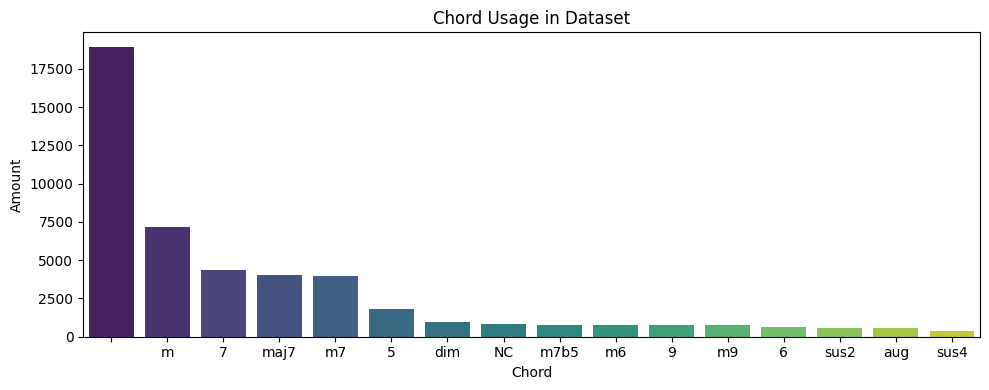

In [ ]:
# Count the labels
label_counts = Counter(y_train.tolist())

# Invert chord_mapping to get names back
inv_chord_mapping = {v: k for k, v in chord_mapping.items()}

# Map label index back to chord name for plotting
chord_names = [inv_chord_mapping[label] for label in label_counts.keys()]
chord_frequencies = list(label_counts.values())

all_chord_names = chord_names + missing_chord_names
all_chord_frequencies = chord_frequencies + [0] * len(missing_chord_names)

# Sort by frequency (optional for nicer plotting)
sorted_indices = np.argsort(all_chord_frequencies)[::-1]
all_chord_names = [all_chord_names[i] for i in sorted_indices]
all_chord_frequencies = [all_chord_frequencies[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(10, 4))

sns.barplot(x=all_chord_names, y=all_chord_frequencies, palette='viridis')
clear_output(wait=True)
plt.xlabel('Chord')
plt.ylabel('Amount')
plt.title('Chord Usage in Dataset')
# plt.xticks(rotation=90)
# plt.xticks(fontsize)  # angled and right-aligned
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classes = np.unique(y_train.cpu().numpy())
# print(classes)
chord_weights = compute_class_weight('balanced', classes=classes, y=y_train.cpu().numpy())
# print(weights)
chord_weights = torch.tensor(chord_weights, dtype=torch.float).to(device)

for i in range(len(classes)):
    print(f'{inv_chord_mapping[classes[i]]}: {(chord_weights[i]):.3f}')

NC: 3.609
: 0.156
m: 0.412
5: 1.614
7: 0.675
maj7: 0.729
m7: 0.744
6: 4.890
m6: 3.780
9: 3.819
m9: 3.889
dim: 3.109
aug: 5.254
sus2: 5.181
sus4: 7.881
m7b5: 3.737


In [ ]:
# class ChordCNN(nn.Module):
#     def __init__(self, num_classes):
#         super(ChordCNN, self).__init__()
#         self.features = nn.Sequential(
#             # Block 1
#             nn.Conv2d(1, 16, kernel_size=3, padding=1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.Conv2d(16, 16, kernel_size=3, padding=1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.MaxPool2d(2),

#             # Block 2
#             nn.Conv2d(16, 32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32, 32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(2),

#             # Block 3
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.AdaptiveAvgPool2d((1, 1))
#         )

#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Dropout(0.3),
#             nn.Linear(64, num_classes)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.classifier(x)
#         return F.log_softmax(x, dim=1)

# # Example usage
# model = ChordCNN(num_classes=len(chord_mapping))
# x_sample = torch.randn(12, 1, 105, 15)
# out = model(x_sample)
# print(out.shape)  # Should be [12, num_classes]


In [ ]:
class ChordCNN(nn.Module):
    def __init__(self, num_classes=len(chord_mapping)):
        super(ChordCNN, self).__init__()
        self.features = nn.Sequential(
            # Block 1 - asymmetric kernel to capture harmonic structure
            nn.Conv2d(1, 32, kernel_size=(7, 3), padding=(3, 1)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=(5, 3), padding=(2, 1)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # → [batch, 32, 42, 215]

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # → [batch, 64, 21, 107]

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # → [batch, 128, 1, 1]
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

# Example usage
model = ChordCNN(num_classes=len(chord_mapping))
x_sample = torch.randn(12, 1, 105, 15)
out = model(x_sample)
print(out.shape)  # Should be [12, num_classes]

torch.Size([12, 16])


In [ ]:
print(os.cpu_count())

12


Epoch [100/100], Expected Time: 215.14 minutes


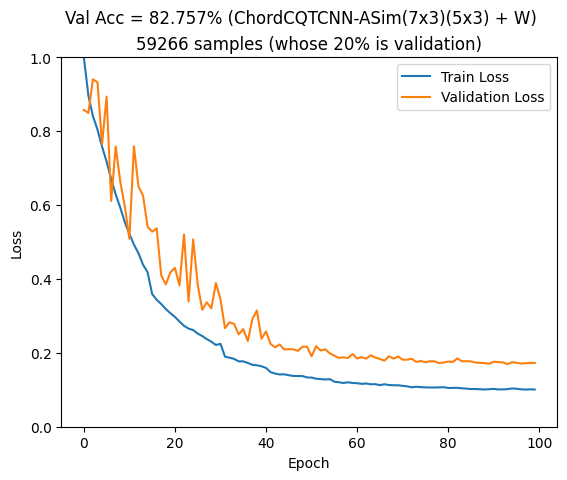

In [ ]:
label_mapping = {v: k for k, v in chord_mapping.items()}

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create DataLoader for training dataset (assuming X_train, y_train are tensors)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=12, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=12, pin_memory=True, persistent_workers=True)

# Create model
# model = PaperCNN(num_classes=len(chord_mapping)).to(device)
model = ChordCNN(num_classes=len(chord_mapping)).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss(weight=chord_weights)  # Normalized weights / Label smoothing
# criterion = nn.CrossEntropyLoss()

# Define loss and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Scheduler for learning rate adjustment
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3,
    verbose=True
)

# Training loop
num_epochs = 100
train_losses = []
val_list = []
results = []

start_time = time.time()

for epoch in range(num_epochs):

    total_loss = 0.0
    model.train()

    # Training phase
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        # print(outputs)
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        total_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            predicted = torch.argmax(outputs, dim=1)

            for prediction, label in zip(predicted, labels):

                if prediction == label:
                    correct += 1

                results.append((label_mapping[prediction.item()], label_mapping[label.item()]))

            total += labels.size(0)

    val_accuracy = correct / total
    val_list.append(1 - val_accuracy)

    # Step scheduler
    scheduler.step(val_list[-1])

    clear_output(wait=True)

    # Plot progress

    current_time = time.time()
    print(f"Epoch [{epoch+1}/{num_epochs}], Expected Time: {((current_time - start_time) * (num_epochs/(epoch+1))) / 60 :.2f} minutes")

    plt.plot(np.array(train_losses) / np.max(train_losses), label='Train Loss')
    plt.plot(np.array(val_list), label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0,1)
    plt.title(f'{total_samples} samples (whose 20% is validation)')
    plt.suptitle(f'Val Acc = {(val_accuracy * 100):.3f}% (ChordCQTCNN-ASim(7x3)(5x3) + W)')
    plt.legend()
    plt.show()

    torch.save(model.state_dict(), 'chordcqtcnn_asim1_0905.pth')
